<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [13]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Clarusway/CNN_Project/cat_dog_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

# Recognizing and Understanding Data

In [67]:
my_data_dir = "data"

In [68]:
os.listdir(my_data_dir) 

['validation', 'train', 'test']

In [69]:
test_path = my_data_dir + '/test/'
validation_path = my_data_dir + '/validation/'
train_path = my_data_dir + '/train/'

In [70]:
os.listdir(test_path)

['5276.jpg',
 '6687.jpg',
 '10629.jpg',
 '10158.jpg',
 '4655.jpg',
 '11483.jpg',
 '6647.jpg',
 '5985.jpg',
 '12319.jpg',
 '4825.jpg',
 '5006.jpg',
 '3967.jpg',
 '4775.jpg',
 '6233.jpg',
 '12140.jpg',
 '4978.jpg',
 '10240.jpg',
 '12014.jpg',
 '11473.jpg',
 '3154.jpg',
 '6738.jpg',
 '6016.jpg',
 '3951.jpg',
 '12346.jpg',
 '6713.jpg',
 '3741.jpg',
 '11252.jpg',
 '3716.jpg',
 '6121.jpg',
 '10901.jpg',
 '4819.jpg',
 '6524.jpg',
 '3907.jpg',
 '5549.jpg',
 '6657.jpg',
 '5650.jpg',
 '11920.jpg',
 '4153.jpg',
 '5395.jpg',
 '12372.jpg',
 '5778.jpg',
 '6473.jpg',
 '11972.jpg',
 '4684.jpg',
 '10374.jpg',
 '5531.jpg',
 '4532.jpg',
 '5208.jpg',
 '11163.jpg',
 '11305.jpg',
 '10452.jpg',
 '4594.jpg',
 '3747.jpg',
 '6847.jpg',
 '12295.jpg',
 '4922.jpg',
 '5401.jpg',
 '5700.jpg',
 '4965.jpg',
 '5560.jpg',
 '4045.jpg',
 '10207.jpg',
 '3275.jpg',
 '5878.jpg',
 '3331.jpg',
 '5500.jpg',
 '4295.jpg',
 '6516.jpg',
 '12169.jpg',
 '6478.jpg',
 '4200.jpg',
 '10830.jpg',
 '6063.jpg',
 '5381.jpg',
 '4024.jpg',
 '5

In [71]:
os.listdir(train_path)

['dog', 'cat']

In [89]:
#os.listdir(validation_path+'dog')

In [73]:
os.listdir(validation_path+'cat')

['336.jpg',
 '2540.jpg',
 '1802.jpg',
 '1013.jpg',
 '2118.jpg',
 '1713.jpg',
 '584.jpg',
 '398.jpg',
 '22.jpg',
 '2298.jpg',
 '2694.jpg',
 '2607.jpg',
 '11.jpg',
 '2303.jpg',
 '1616.jpg',
 '437.jpg',
 '2239.jpg',
 '58.jpg',
 '2314.jpg',
 '63.jpg',
 '570.jpg',
 '1587.jpg',
 '2181.jpg',
 '1104.jpg',
 '1473.jpg',
 '1965.jpg',
 '1363.jpg',
 '1262.jpg',
 '2106.jpg',
 '359.jpg',
 '2312.jpg',
 '2441.jpg',
 '1020.jpg',
 '711.jpg',
 '2502.jpg',
 '1159.jpg',
 '1138.jpg',
 '309.jpg',
 '2247.jpg',
 '1815.jpg',
 '1502.jpg',
 '1065.jpg',
 '2356.jpg',
 '2531.jpg',
 '1953.jpg',
 '600.jpg',
 '1076.jpg',
 '2585.jpg',
 '35.jpg',
 '1419.jpg',
 '1078.jpg',
 '1298.jpg',
 '1051.jpg',
 '1558.jpg',
 '2480.jpg',
 '2382.jpg',
 '447.jpg',
 '1514.jpg',
 '484.jpg',
 '1303.jpg',
 '1507.jpg',
 '1260.jpg',
 '1646.jpg',
 '1349.jpg',
 '1923.jpg',
 '2486.jpg',
 '2424.jpg',
 '1535.jpg',
 '1657.jpg',
 '2191.jpg',
 '2248.jpg',
 '174.jpg',
 '1772.jpg',
 '2705.jpg',
 '456.jpg',
 '1092.jpg',
 '1901.jpg',
 '2034.jpg',
 '2454.jp

In [74]:
classes = os.listdir(train_path)
classes

['dog', 'cat']

**Let's check how many images there are.**

In [75]:
len(os.listdir(train_path+'dog')), len(os.listdir(train_path+'cat'))

(5026, 12500)

In [76]:
len(os.listdir(validation_path+'dog')), len(os.listdir(validation_path+'cat'))

(1071, 1219)

**Let's take an example images from both train-cat and train-dog folders to observe process** 

In [77]:
os.listdir(train_path+'dog')[:10]

['dog.12403.jpg',
 'dog.12131.jpg',
 'dog.10215.jpg',
 'dog.1976.jpg',
 'dog.3026.jpg',
 'dog.10321.jpg',
 'dog.12144.jpg',
 'dog.12463.jpg',
 'dog.10587.jpg',
 'dog.10698.jpg']

In [78]:
os.listdir(train_path+'dog')[3]

'dog.1976.jpg'

In [79]:
os.listdir(train_path+'cat')[3]

'cat.11684.jpg'

In [80]:
dog_cell_path = train_path+'dog'+'/dog.12349.jpg'

In [81]:
cat_cell_path = train_path+'cat'+'/cat.560.jpg'

In [82]:
imread(dog_cell_path)

array([[[146, 146, 138],
        [146, 145, 140],
        [157, 156, 151],
        ...,
        [ 71,  76,  72],
        [ 85,  90,  84],
        [ 85,  90,  84]],

       [[131, 131, 123],
        [120, 119, 114],
        [123, 122, 117],
        ...,
        [ 74,  79,  75],
        [ 89,  94,  88],
        [ 89,  94,  88]],

       [[106, 106,  98],
        [ 88,  87,  82],
        [ 81,  80,  75],
        ...,
        [ 90,  92,  89],
        [ 88,  90,  85],
        [ 88,  90,  85]],

       ...,

       [[208, 203, 197],
        [212, 207, 201],
        [213, 208, 202],
        ...,
        [181, 176, 172],
        [177, 172, 168],
        [177, 172, 168]],

       [[213, 208, 202],
        [216, 211, 205],
        [218, 213, 207],
        ...,
        [175, 170, 166],
        [165, 160, 156],
        [165, 160, 156]],

       [[202, 197, 191],
        [205, 200, 194],
        [209, 204, 198],
        ...,
        [170, 162, 159],
        [169, 161, 158],
        [169, 161, 158]]

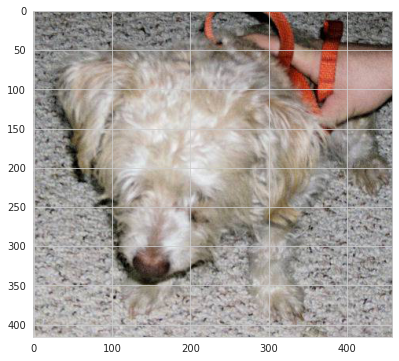

In [83]:
plt.imshow(imread(dog_cell_path));

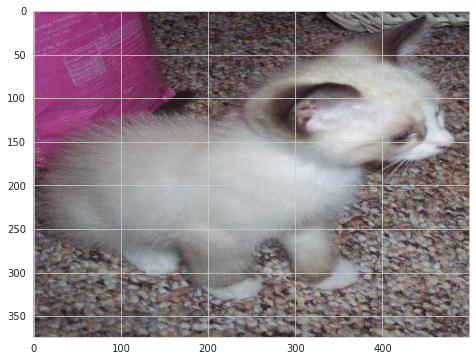

In [84]:
plt.imshow(imread(cat_cell_path));

In [85]:
# View a random image
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (375, 499, 3)


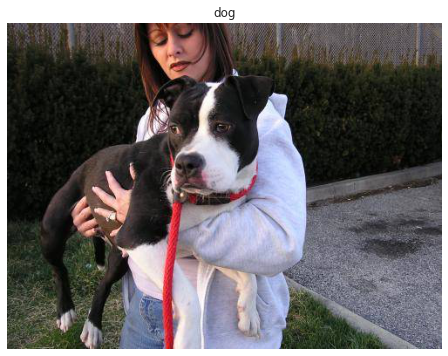

In [86]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="dog")

Image shape: (332, 500, 3)


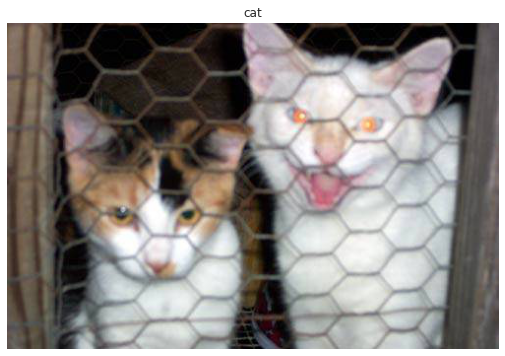

In [87]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="cat")

Image shape: (318, 500, 3)


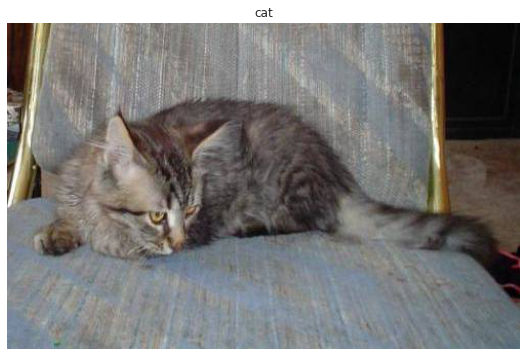

In [88]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_path,
                        target_class=random.choice(classes)) # get a random class name

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [38]:
imread(dog_cell_path).shape

(416, 458, 3)

In [39]:
imread(cat_cell_path).shape

(374, 500, 3)

In [40]:
x = [imread(train_path+'dog/'+image).shape[0] for image in os.listdir(train_path+'dog') if 'Thumbs.db' not in image]
y = [imread(train_path+'dog/'+image).shape[1] for image in os.listdir(train_path+'dog') if 'Thumbs.db' not in image]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


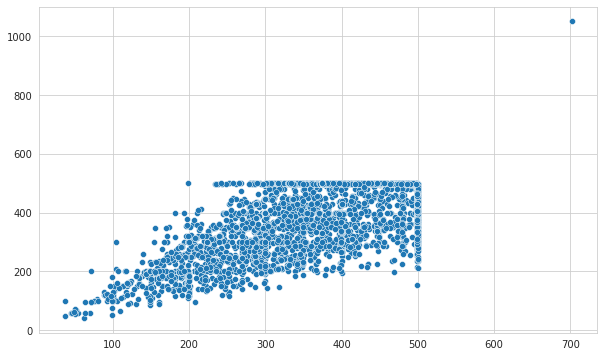

In [41]:
sns.scatterplot(x,y);

In [42]:
np.mean(x), np.median(x)

(365.0505372065261, 374.0)

In [43]:
np.mean(y), np.median(y)

(398.9930362116992, 426.0)

In [44]:
# Smaller inputs mean a model that is faster to train, and typically this concern dominates the choice of image size. In this case, we will follow this approach and choose a fixed size of 200×200 pixels
image_shape = (200,200,3)

## Scaling

**Let's check the images if they are needed to be scaled or not**

In [45]:
imread(dog_cell_path).max()

255

In [46]:
imread(cat_cell_path).max()

246

In [47]:
# Normalize image pixels

# It will be done while image manipulation with rescale = 1/255

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [49]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

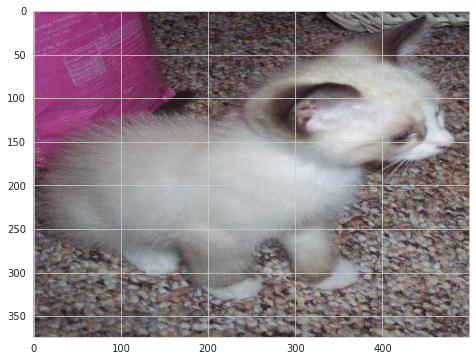

In [50]:
plt.imshow(imread(cat_cell_path));

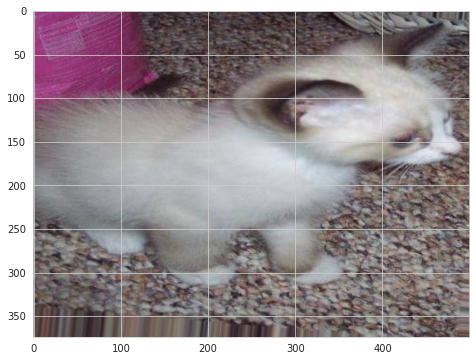

In [51]:
plt.imshow(image_gen.random_transform(imread(cat_cell_path)));

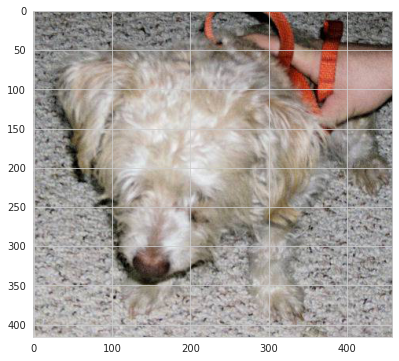

In [52]:
plt.imshow(imread(dog_cell_path));

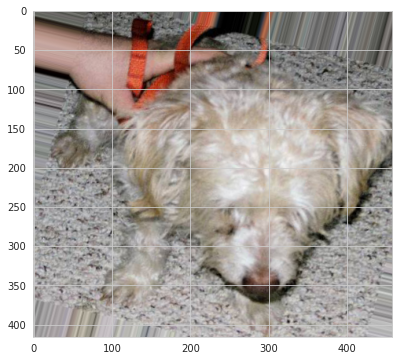

In [53]:
plt.imshow(image_gen.random_transform(imread(dog_cell_path)));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [54]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [55]:
image_gen.flow_from_directory(validation_path)

Found 2290 images belonging to 2 classes.


In [56]:
train_image_gen = image_gen.flow_from_directory(directory=train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode='binary',
                                                shuffle=True)

Found 17526 images belonging to 2 classes.


In [57]:
validation_image_gen = image_gen.flow_from_directory(directory=validation_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

Found 2290 images belonging to 2 classes.


In [58]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [59]:
validation_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [60]:
train_image_gen[0]

(array([[[[0.8196079 , 0.7568628 , 0.7607844 ],
          [0.8196079 , 0.7568628 , 0.7607844 ],
          [0.8199674 , 0.7572223 , 0.76114386],
          ...,
          [0.6402797 , 0.57873034, 0.5517455 ],
          [0.6434592 , 0.57287097, 0.5571847 ],
          [0.6392157 , 0.5686275 , 0.5529412 ]],
 
         [[0.8234348 , 0.76068974, 0.7646113 ],
          [0.82033694, 0.75759184, 0.7615134 ],
          [0.8196079 , 0.7568628 , 0.7607844 ],
          ...,
          [0.64294577, 0.57784164, 0.5553002 ],
          [0.6416819 , 0.5710937 , 0.5554074 ],
          [0.6392157 , 0.5686275 , 0.5529412 ]],
 
         [[0.8296816 , 0.7669365 , 0.77085805],
          [0.8308112 , 0.7680661 , 0.7719877 ],
          [0.8277133 , 0.7649682 , 0.7688898 ],
          ...,
          [0.64561176, 0.576953  , 0.55885494],
          [0.6399045 , 0.56931627, 0.55363   ],
          [0.6392157 , 0.5686275 , 0.5529412 ]],
 
         ...,
 
         [[0.61069655, 0.551873  , 0.52442205],
          [0.60526

In [61]:
validation_image_gen[0]

(array([[[[0.2804604 , 0.1902643 , 0.21379372],
          [0.2427053 , 0.15250921, 0.17603862],
          [0.11331884, 0.02328542, 0.0466115 ],
          ...,
          [0.1533504 , 0.0906053 , 0.03178177],
          [0.15182818, 0.08908309, 0.03025956],
          [0.15030597, 0.08756088, 0.02873735]],
 
         [[0.2861279 , 0.1959318 , 0.21946122],
          [0.26144165, 0.17124557, 0.19477499],
          [0.14217766, 0.05198157, 0.07551099],
          ...,
          [0.14586692, 0.08312181, 0.02429828],
          [0.14547472, 0.08272962, 0.02390609],
          [0.14623582, 0.08349073, 0.02466719]],
 
         [[0.29100668, 0.20081061, 0.22434002],
          [0.26710916, 0.17691307, 0.2004425 ],
          [0.17213446, 0.08193837, 0.10546778],
          ...,
          [0.14845535, 0.08571026, 0.02688673],
          [0.14921647, 0.08647137, 0.02764783],
          [0.14997756, 0.08723247, 0.02840894]],
 
         ...,
 
         [[0.32318977, 0.2290721 , 0.28397408],
          [0.33991

In [62]:
train_image_gen[0][0].shape

(32, 200, 200, 3)

In [63]:
train_image_gen[0][0][0].shape

(200, 200, 3)

In [64]:
len(train_image_gen), len(validation_image_gen)

(548, 72)

In [97]:
validation_image_gen.labels.unique()

AttributeError: ignored

# Modelling

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [99]:
help(class_weight)

Help on module sklearn.utils.class_weight in sklearn.utils:

NAME
    sklearn.utils.class_weight

DESCRIPTION
    # Authors: Andreas Mueller
    #          Manoj Kumar
    # License: BSD 3 clause

FUNCTIONS
    compute_class_weight(class_weight, *, classes, y)
        Estimate class weights for unbalanced datasets.
        
        Parameters
        ----------
        class_weight : dict, 'balanced' or None
            If 'balanced', class weights will be given by
            ``n_samples / (n_classes * np.bincount(y))``.
            If a dictionary is given, keys are classes and values
            are corresponding class weights.
            If None is given, the class weights will be uniform.
        
        classes : ndarray
            Array of the classes occurring in the data, as given by
            ``np.unique(y_org)`` with ``y_org`` the original class labels.
        
        y : array-like of shape (n_samples,)
            Array of original class labels per sample.
        


In [100]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(validation_image_gen.labels),
                                                  y=validation_image_gen.labels)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.9392945036915504, 1: 1.069094304388422}

In [105]:
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Flatten())


model1.add(Dense(64))
model1.add(Activation('relu'))

model1.add(Dropout(0.5))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

# optimizer = keras.optimizers.Adam(lr=0.01)
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [106]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 147456)            0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [107]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [108]:
model1.fit(train_image_gen,
          epochs=10,
          steps_per_epoch=len(train_image_gen),
          validation_data=validation_image_gen,
          validation_steps=len(validation_image_gen),
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/10
548/548 [==============================] - 1114s 2s/step - loss: 0.6334 - accuracy: 0.7191 - val_loss: 0.7098 - val_accuracy: 0.5755
Epoch 2/10
548/548 [==============================] - 1229s 2s/step - loss: 0.5420 - accuracy: 0.7492 - val_loss: 0.5870 - val_accuracy: 0.6882
Epoch 3/10
548/548 [==============================] - 1099s 2s/step - loss: 0.5076 - accuracy: 0.7694 - val_loss: 0.6368 - val_accuracy: 0.6524
Epoch 4/10
548/548 [==============================] - 1097s 2s/step - loss: 0.4855 - accuracy: 0.7811 - val_loss: 0.5731 - val_accuracy: 0.7017
Epoch 5/10
548/548 [==============================] - 1095s 2s/step - loss: 0.4662 - accuracy: 0.7916 - val_loss: 0.5679 - val_accuracy: 0.7153
Epoch 6/10
548/548 [==============================] - 1100s 2s/step - loss: 0.4572 - accuracy: 0.7929 - val_loss: 0.5232 - val_accuracy: 0.7445
Epoch 7/10
548/548 [==============================] - 1093s 2s/step - loss: 0.4451 - accuracy: 0.8006 - val_loss: 0.5915 - val_accuracy:

In [109]:
model1.metrics_names

['loss', 'accuracy']

In [110]:
summary = pd.DataFrame(model1.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.633,0.719,0.710,0.576
1,0.542,0.749,0.587,0.688
2,0.508,0.769,0.637,0.652
3,0.486,0.781,0.573,0.702
4,0.466,0.792,0.568,0.715


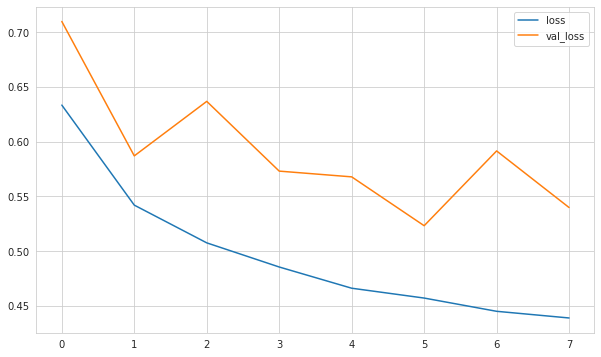

In [111]:
summary[["loss", "val_loss"]].plot();

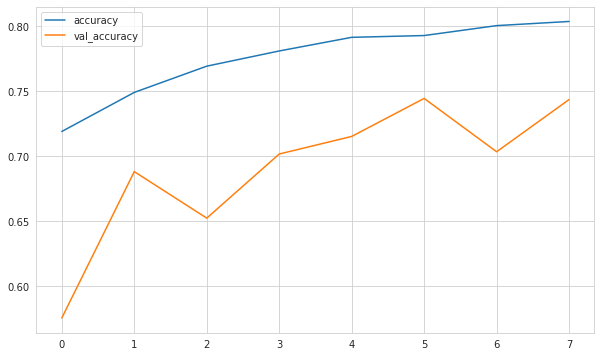

In [112]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [113]:
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
score = model1.evaluate(validation_image_gen)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

72/72 [==============================] - 55s 760ms/step - loss: 0.5200 - accuracy: 0.7445
Validation loss: 0.520034909248352
Validation accuracy: 0.7445414662361145


In [115]:
pred_prob = model1.predict(validation_image_gen)

In [116]:
pred_prob

array([[0.3100379 ],
       [0.32781267],
       [0.62932456],
       ...,
       [0.9338109 ],
       [0.8795559 ],
       [0.9928441 ]], dtype=float32)

In [117]:
y_pred = pred_prob > 0.5

In [118]:
y_pred

array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [119]:
y_validation = validation_image_gen.classes
y_validation

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [120]:
print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79      1219
           1       0.81      0.60      0.69      1071

    accuracy                           0.75      2290
   macro avg       0.76      0.74      0.74      2290
weighted avg       0.76      0.75      0.74      2290



In [121]:
confusion_matrix(y_validation, y_pred)

array([[1070,  149],
       [ 424,  647]])

In [122]:
model1.save('cat_dog_classification_model1.h5')

# Prediction

In [123]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [124]:
model=load_model('cat_dog_classification_model1.h5')

In [125]:
target_class=random.choice(classes)
target_class

'dog'

In [155]:
random_image = random.sample(os.listdir(validation_path + target_class), 1)
random_image

['1972.jpg']

In [156]:
image_path = validation_path + target_class + "/" + random_image[0]
image_path

'data/validation/dog/1972.jpg'

In [157]:
my_image = image.load_img(image_path, target_size=image_shape)

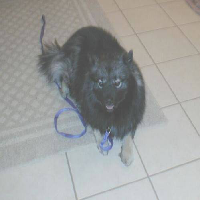

In [158]:
my_image

In [159]:
type(my_image)

PIL.Image.Image

In [160]:
#my_image = np.array(my_image)
my_image = image.img_to_array(my_image)

In [161]:
my_image.shape

(200, 200, 3)

In [162]:
my_image = np.expand_dims(my_image, axis=0)

In [163]:
my_image.shape

(1, 200, 200, 3)

In [164]:
model.predict(my_image)

array([[1.]], dtype=float32)

In [165]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>